In [24]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df=pd.read_excel('大盤指數盤後數據.xlsx',header=0)

In [26]:
X = [] #empty list
Y = [] #empty list
for i in range(len(df.index)-10):
    X.append(list(df.loc[i:i+9]['收盤價']))
    Y.append(df.收盤價[i+10])

In [27]:
X=np.array(X)

In [28]:
X[1]

array([122.93, 122.51, 121.94, 121.13, 122.04, 122.41, 122.38, 121.88,
       123.03, 122.77])

In [29]:
Y

[122.77,
 122.87,
 124.22,
 124.59,
 124.43,
 125.77,
 126.49,
 126.89,
 128.26,
 127.9,
 128.02,
 128.96,
 129.75,
 129.89,
 130.04,
 131.4,
 130.81,
 132.25,
 132.05,
 131.55,
 131.46,
 130.34,
 130.53,
 130.04,
 129.41,
 128.7,
 127.69,
 128.71,
 129.39,
 129.01,
 128.63,
 128.48,
 127.97,
 127.92,
 128.55,
 127.82,
 127.94,
 128.99,
 128.25,
 126.69,
 125.71,
 124.99,
 124.8,
 125.25,
 124.85,
 124.17,
 124.3,
 123.99,
 123.27,
 123.44,
 122.65,
 122.76,
 122.87,
 122.44,
 121.16,
 120.61,
 118.01,
 117.78,
 118.48,
 119.87,
 120.04,
 119.09,
 118.96,
 118.72,
 118.43,
 118.27,
 118.58,
 118.06,
 118.16,
 118.57,
 118.12,
 117.48,
 116.95,
 116.76,
 116.48,
 117.02,
 117.06,
 117.08,
 118.2,
 117.94,
 117.84,
 118.03,
 118.11,
 118.15,
 117.56,
 118.11,
 118.35,
 118.34,
 118.16,
 119.04,
 119.19,
 119.71,
 119.5,
 118.78,
 118.89,
 119.29,
 119.43,
 121.59,
 121.12,
 122.31,
 123.62,
 124.71,
 126.3,
 127.26,
 127.14,
 129.17,
 126.37,
 128.57,
 129.03,
 130.24,
 132.6,
 134.14,
 

In [30]:
%env KERAS_BACKEND = tensorflow

from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Embedding
from keras.layers import LSTM

env: KERAS_BACKEND=tensorflow


In [31]:
x = Input(shape=(10,))
f_1 = Dense(100, activation='relu')
f_2 = Dense(100, activation='relu')
f_3 = Dense(1, activation='relu')

h_1 = f_1(x)
h_2 = f_2(h_1)
y = f_3(h_2)

model = Model(x, y)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 11,301
Trainable params: 11,301
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 9487)

In [35]:
model.fit(x_train, y_train,epochs=100)

Epoch 1/100
9200/9200 [==============================] - 3s 349us/step - loss: 363213.7273
Epoch 2/100
9200/9200 [==============================] - 1s 80us/step - loss: 36917.7635
Epoch 3/100
9200/9200 [==============================] - 1s 83us/step - loss: 30518.2802
Epoch 4/100
9200/9200 [==============================] - 1s 89us/step - loss: 26975.4987
Epoch 5/100
9200/9200 [==============================] - 1s 83us/step - loss: 21926.8102
Epoch 6/100
9200/9200 [==============================] - 1s 81us/step - loss: 18129.2486
Epoch 7/100
9200/9200 [==============================] - 1s 83us/step - loss: 15829.5992
Epoch 8/100
9200/9200 [==============================] - 1s 82us/step - loss: 13719.1549
Epoch 9/100
9200/9200 [==============================] - 1s 87us/step - loss: 11647.0150
Epoch 10/100
9200/9200 [==============================] - 1s 86us/step - loss: 11431.3337
Epoch 11/100
9200/9200 [==============================] - 1s 90us/step - loss: 11175.6725
Epoch 12/100
9200

9200/9200 [==============================] - 1s 80us/step - loss: 8366.9498
Epoch 93/100
9200/9200 [==============================] - 1s 79us/step - loss: 8644.2298
Epoch 94/100
9200/9200 [==============================] - 1s 81us/step - loss: 8005.0121
Epoch 95/100
9200/9200 [==============================] - 1s 79us/step - loss: 8431.7956
Epoch 96/100
9200/9200 [==============================] - 1s 79us/step - loss: 8334.2722
Epoch 97/100
9200/9200 [==============================] - 1s 85us/step - loss: 10352.5833
Epoch 98/100
9200/9200 [==============================] - 1s 81us/step - loss: 8321.0408
Epoch 99/100
9200/9200 [==============================] - 1s 87us/step - loss: 8392.0946
Epoch 100/100
9200/9200 [==============================] - 1s 88us/step - loss: 8505.4155


In [36]:
model.evaluate(x_test, y_test)

3944/3944 [==============================] - 0s 66us/step


7331.745739671812

In [38]:
df.head()

,證券代碼,年月日,開盤價,最高價,最低價,收盤價,股價漲跌,股價漲跌(%),漲跌平,成交值,外資買賣超市值(百萬),自營買賣超市值(百萬),融資增減(千元),融券增減(張)
0,Y9999 加權指數,1971-01-05,NaN,NaN,NaN,123.28,NaN,NaN,NaN,10000,NaN,NaN,NaN,NaN
1,Y9999 加權指數,1971-01-06,123.28,NaN,NaN,122.93,-0.35,-0.002839,0.0,4000,NaN,NaN,NaN,NaN
2,Y9999 加權指數,1971-01-07,122.93,NaN,NaN,122.51,-0.42,-0.003417,0.0,11000,NaN,NaN,NaN,NaN
3,Y9999 加權指數,1971-01-08,122.51,NaN,NaN,121.94,-0.57,-0.004653,0.0,14000,NaN,NaN,NaN,NaN
4,Y9999 加權指數,1971-01-09,121.94,NaN,NaN,121.13,-0.81,-0.006643,-1.0,10000,NaN,NaN,NaN,NaN


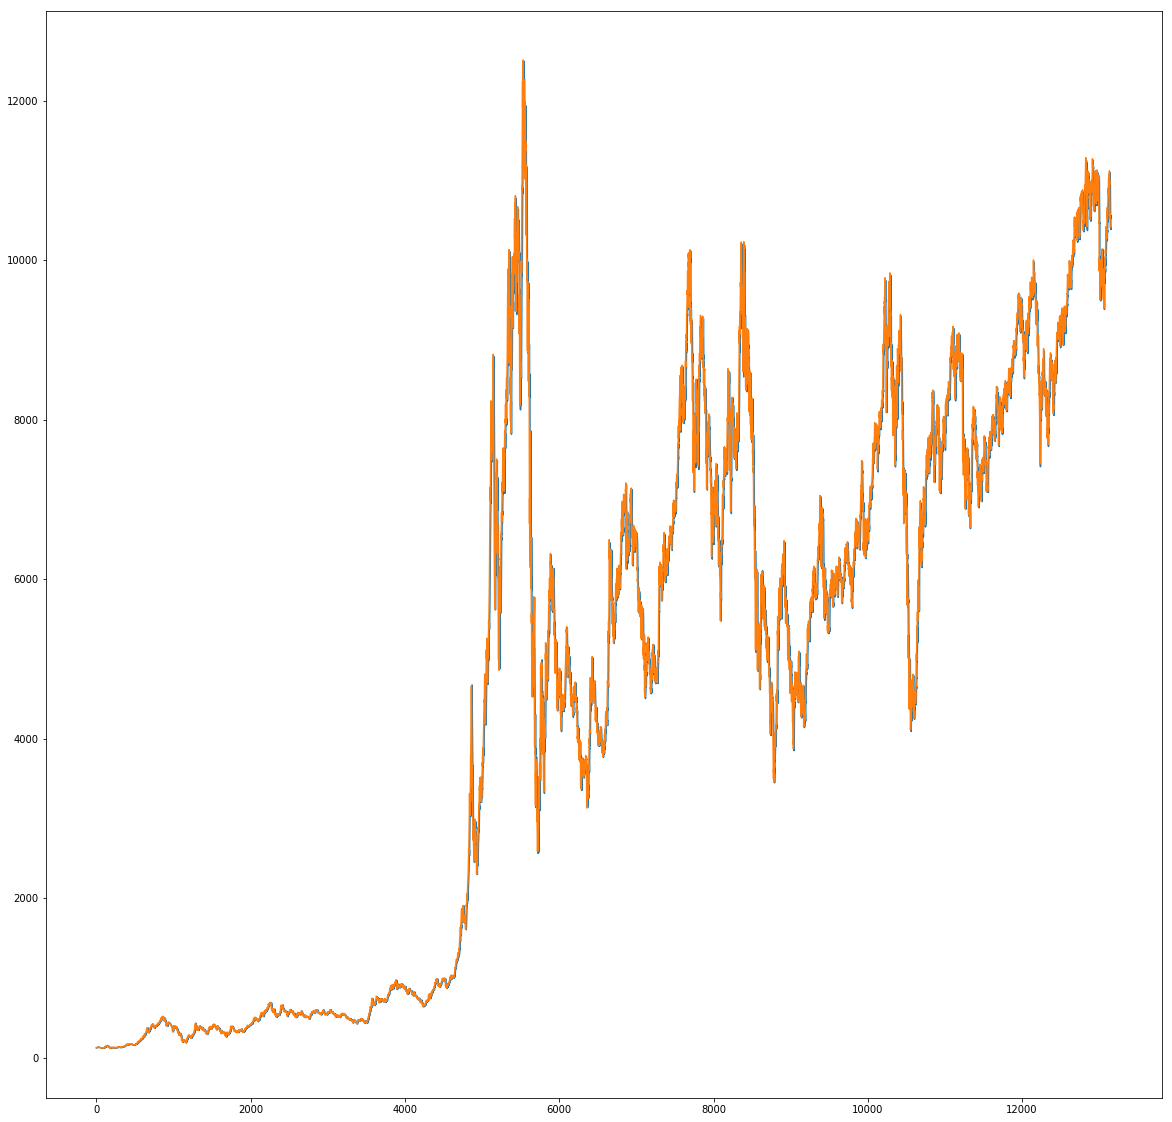

In [62]:
plt.figure(figsize=(20, 20))

plt.plot(df.收盤價, '-')
plt.plot(model.predict(X), '-')

plt.show()